### Text To Image with Stable Diffusion
Stable Diffusion을 활용한 Text To Image Task를 수행한다.

In [1]:
import torch
from diffusers import DiffusionPipeline

torch.cuda.is_available()

True

In [2]:
pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.28.0.dev0",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

### Text To Image
한글지원x, 스토리보드도 일부 나오는 모습을 보이나 아래의 문제점이 있긴 함
- 이야기와 크게 연관이 없어보인다
- 대략 1시간 분량의 촬영을 위해서는 700개의 콘티가, 1시간반 분량의 촬영을 위해서는 1000개의 콘티가 필요한데 이를 모두 처음 생성하려 하기만 해도 11시간이 걸린다.

  0%|          | 0/50 [00:00<?, ?it/s]

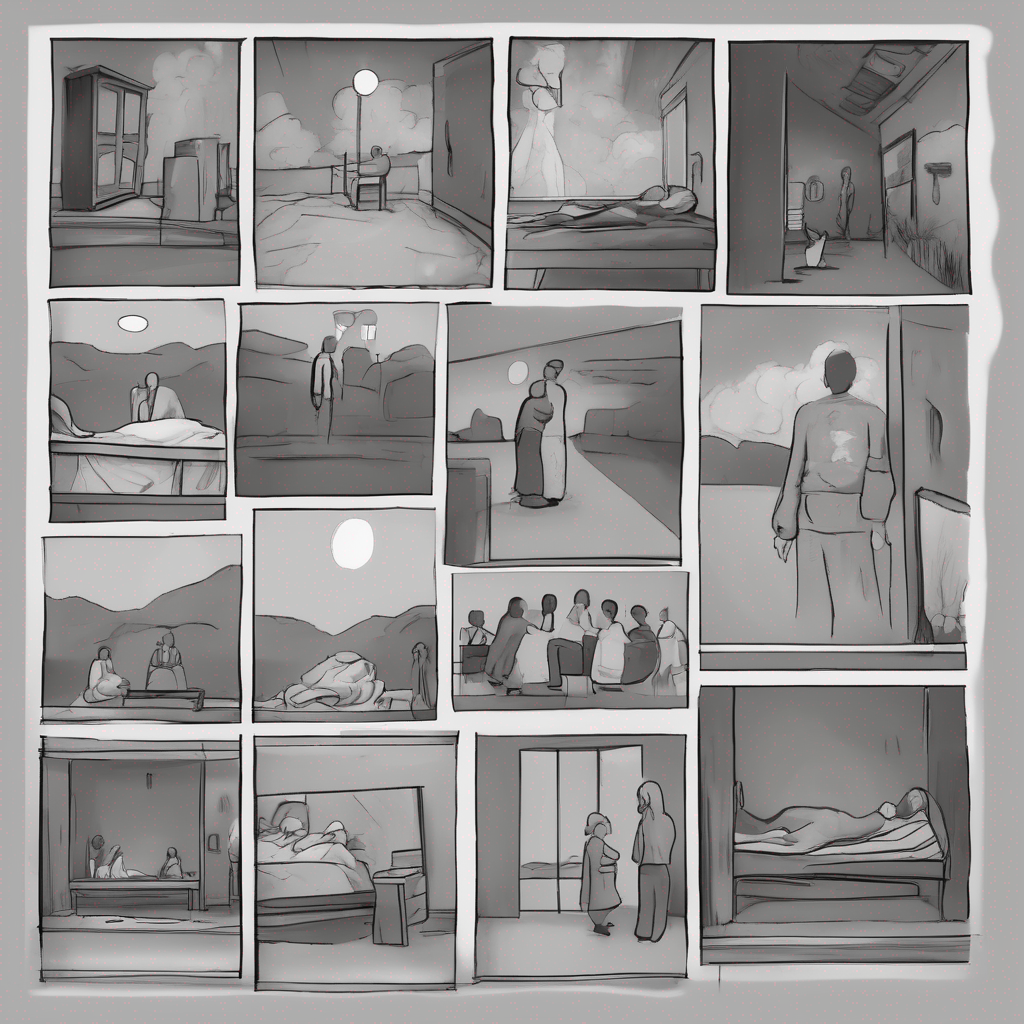

In [3]:
prompt = "One cut of high quality movie's storyboard that tells the story of the male protagonist overcoming the ordeal of separation. The background is the living room, crying alone"

images = pipe(prompt=prompt).images
images